<a href="https://colab.research.google.com/github/levi178u/Hackodisha/blob/main/Fradulence_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClasssifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



data= pd.read_csv('/content/Training_data.csv')
data_test = pd.read_csv('/content/Testing_data .csv')
data.head(10)


,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,Transaction_Time,Coordinates,ip_addresses
0,1,PAYMENT,9839.64,ACC10204397,170136.00,160296.36,ACC18330495,0.0,0.00,0,0,06-06-24,00:34:36,"(43.550740883275296, -141.72974723173664)",15.246.64.212
1,2,PAYMENT,1864.28,ACC36787793,21249.00,19384.72,ACC43829436,0.0,0.00,0,0,16-07-24,19:13:41,"(78.74630788793377, -2.8864833917104136)",29.13.180.155
2,3,TRANSFER,181.00,ACC69442839,181.00,0.00,ACC19495987,0.0,0.00,1,0,24-02-24,07:29:34,"(-48.70562123207855, 3.433940326483139)",132.7.36.190
3,4,CASH_OUT,181.00,ACC13673580,181.00,0.00,ACC94944418,21182.0,0.00,1,0,30-12-24,04:48:05,"(-54.63748785685925, 60.509022769098294)",153.105.24.95
4,5,PAYMENT,11668.14,ACC46873273,41554.00,29885.86,ACC17787237,0.0,0.00,0,0,17-04-24,05:54:56,"(-57.96291770179832, -99.23770861640779)",161.203.207.51
5,6,PAYMENT,7817.71,ACC84508864,53860.00,46042.29,ACC67530981,0.0,0.00,0,0,25-09-24,11:26:13,"(21.923751935157796, 135.6968762975912)",141.227.154.31
6,7,PAYMENT,7107.77,ACC43559957,183195.00,176087.23,ACC86690831,0.0,0.00,0,0,28-04-24,18:29:42,"(-83.83903479292408, -136.8807093894966)",18.151.66.37
7,8,PAYMENT,7861.64,ACC81042647,176087.23,168225.59,ACC97891146,0.0,0.00,0,0,27-02-24,13:05:46,"(-25.95184756465001, 79.06697397817305)",104.9.12.103
8,9,PAYMENT,4024.36,ACC41426604,2671.00,0.00,ACC74713816,0.0,0.00,0,0,13-04-24,11:26:05,"(67.30427834734033, 64.66394988831104)",139.50.143.112
9,10,DEBIT,5337.77,ACC95900894,41720.00,36382.23,ACC60296984,41898.0,40348.79,0,0,02-07-24,15:49:31,"(34.92976887714575, -63.005535432983436)",98.145.54.164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_id      699 non-null    int64  
 1   Transfer_type       699 non-null    object 
 2   Amount              699 non-null    float64
 3   Sender_account      699 non-null    object 
 4   Initial_balance_p1  699 non-null    float64
 5   new_balance_1       699 non-null    float64
 6   Recipient_account   699 non-null    object 
 7   Initial_balance_p2  699 non-null    float64
 8   new_balance_2       699 non-null    float64
 9   isFraud             699 non-null    int64  
 10  isFlaggedFraud      699 non-null    int64  
 11  Transaction_Date    699 non-null    object 
 12  Transaction_Time    699 non-null    object 
 13  Coordinates         699 non-null    object 
 14  ip_addresses        699 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 82.0+ KB

Data preprocessing part

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], format='%d-%m-%y')
data['Transaction_Time'] = pd.to_datetime(data['Transaction_Time'], format='%H:%M:%S').dt.time


In [ ]:
data[['Latitude', 'Longitude']] = data['Coordinates'].str.extract(r'\(([^,]+), ([^,]+)\)')
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)


data.drop(columns=['Coordinates', 'Transaction_Time'], inplace=True)
data.head()


,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,ip_addresses,Latitude,Longitude
0,1,PAYMENT,9839.64,ACC10204397,170136.0,160296.36,ACC18330495,0.0,0.0,0,0,2024-06-06,15.246.64.212,43.550741,-141.729747
1,2,PAYMENT,1864.28,ACC36787793,21249.0,19384.72,ACC43829436,0.0,0.0,0,0,2024-07-16,29.13.180.155,78.746308,-2.886483
2,3,TRANSFER,181.00,ACC69442839,181.0,0.00,ACC19495987,0.0,0.0,1,0,2024-02-24,132.7.36.190,-48.705621,3.433940
3,4,CASH_OUT,181.00,ACC13673580,181.0,0.00,ACC94944418,21182.0,0.0,1,0,2024-12-30,153.105.24.95,-54.637488,60.509023
4,5,PAYMENT,11668.14,ACC46873273,41554.0,29885.86,ACC17787237,0.0,0.0,0,0,2024-04-17,161.203.207.51,-57.962918,-99.237709


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_id      699 non-null    int64         
 1   Transfer_type       699 non-null    object        
 2   Amount              699 non-null    float64       
 3   Sender_account      699 non-null    object        
 4   Initial_balance_p1  699 non-null    float64       
 5   new_balance_1       699 non-null    float64       
 6   Recipient_account   699 non-null    object        
 7   Initial_balance_p2  699 non-null    float64       
 8   new_balance_2       699 non-null    float64       
 9   isFraud             699 non-null    int64         
 10  isFlaggedFraud      699 non-null    int64         
 11  Transaction_Date    699 non-null    datetime64[ns]
 12  ip_addresses        699 non-null    object        
 13  Latitude            699 non-null    float64       

In [ ]:
data.describe()

,Transaction_id,Amount,Initial_balance_p1,new_balance_1,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,Latitude,Longitude
count,699.000000,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,699.000000,699.0,699,699.000000,699.000000
mean,350.000000,1.269811e+05,1.217855e+06,1.252809e+06,7.175774e+05,1.299207e+06,0.008584,0.0,2024-06-30 07:45:34.763948800,0.780455,-1.929715
min,1.000000,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,2024-01-02 00:00:00,-89.569855,-179.467471
25%,175.500000,4.859210e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,2024-03-30 00:00:00,-43.278919,-88.906294
50%,350.000000,2.153096e+04,1.986900e+04,1.076672e+04,5.790166e+04,0.000000e+00,0.000000,0.0,2024-06-26 00:00:00,-0.944188,-2.886483
75%,524.500000,1.588854e+05,6.697019e+05,7.150038e+05,5.076523e+05,9.714189e+05,0.000000,0.0,2024-09-27 00:00:00,43.502462,86.278912
max,699.000000,2.545478e+06,9.716462e+06,9.987287e+06,1.700100e+07,1.916920e+07,1.000000,0.0,2024-12-30 00:00:00,89.942208,179.187398
std,201.928205,2.600370e+05,2.399673e+06,2.455111e+06,2.166217e+06,3.707629e+06,0.092316,0.0,NaN,51.128015,103.377859


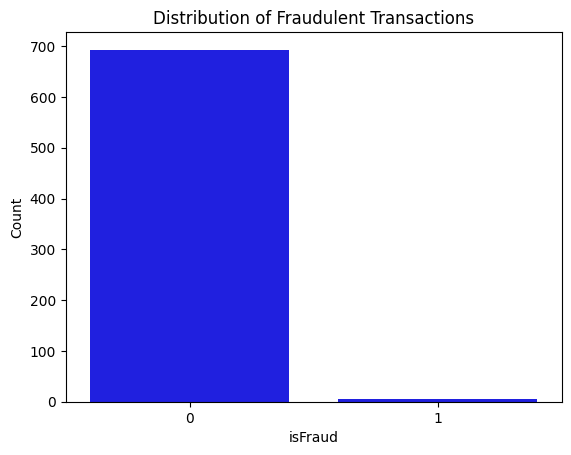

In [ ]:
sns.countplot(x='isFraud', data=data, color='blue')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()



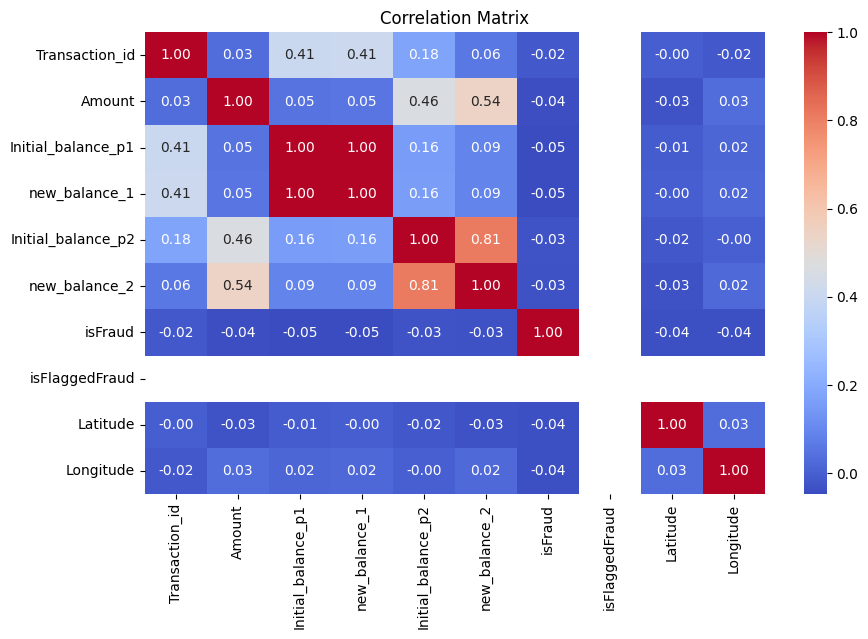

In [ ]:
num_features = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(data[num_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data['balance_change'] = data['Initial_balance_p1'] - data['new_balance_1']


data['balance_1_ratio'] = data['Initial_balance_p1'] / (data['Initial_balance_p1'] + 1)
data['balance_2_ratio'] = data['Initial_balance_p2'] / (data['Initial_balance_p2'] + 1)

In [ ]:
data.head(5)

,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,isFlaggedFraud,Transaction_Date,ip_addresses,Latitude,Longitude,balance_change,balance_1_ratio,balance_2_ratio
0,1,PAYMENT,9839.64,ACC10204397,170136.0,160296.36,ACC18330495,0.0,0.0,0,0,2024-06-06,15.246.64.212,43.550741,-141.729747,9839.64,0.999994,0.000000
1,2,PAYMENT,1864.28,ACC36787793,21249.0,19384.72,ACC43829436,0.0,0.0,0,0,2024-07-16,29.13.180.155,78.746308,-2.886483,1864.28,0.999953,0.000000
2,3,TRANSFER,181.00,ACC69442839,181.0,0.00,ACC19495987,0.0,0.0,1,0,2024-02-24,132.7.36.190,-48.705621,3.433940,181.00,0.994505,0.000000
3,4,CASH_OUT,181.00,ACC13673580,181.0,0.00,ACC94944418,21182.0,0.0,1,0,2024-12-30,153.105.24.95,-54.637488,60.509023,181.00,0.994505,0.999953
4,5,PAYMENT,11668.14,ACC46873273,41554.0,29885.86,ACC17787237,0.0,0.0,0,0,2024-04-17,161.203.207.51,-57.962918,-99.237709,11668.14,0.999976,0.000000


In [ ]:
features = ['Amount', 'Initial_balance_p1', 'new_balance_1', 'Initial_balance_p2', 'new_balance_2', 'balance_change', 'balance_1_ratio', 'balance_2_ratio']
x = data[features]
y = data['isFraud']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lor= LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [ ]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
xgb= XGBClassifier(use_label_encoder= False, eval_metric='logloss')
xgb.fit(x_train,y_train)

#log_loss = - (y * log(p) + (1 - y) * log(1 - p))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
def evaluation(model, x_test, y_test):
  y_pred = model.predict(x_test)
  y_prob = model.predict_proba(x_test)[:, 1]

  score = model.score(x_test, y_test)
  accuracy = accuracy_score(y_test, y_pred)

  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)



  precision_recall_curve(y_test, y_prob)


  roc_auc = roc_auc_score(y_test, y_prob)



  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')

  print(f'Accuracy: {accuracy}')
  print(f'Score: {score}')
  print(f'ROC AUC: {roc_auc}')

  fpr, tpr, _ = roc_curve(y_test, y_prob)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))


  plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], color='red', linewidth=2)
  plt.scatter(fpr, tpr, color='blue', marker='o')


  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

  plt.title('ROC Curve')
  plt.legend(loc='lower right')

  plt.grid()
  plt.show()




Logistic Regression: 
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Score: 1.0
ROC AUC: 1.0
[[137   0]
 [  0   3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00         3

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



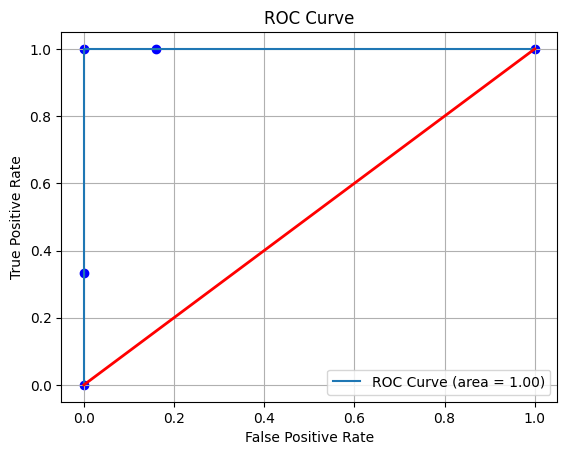

In [ ]:

print("Logistic Regression: ")
evaluation(lor, x_test, y_test)



Random Forest: 
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9785714285714285
Score: 0.9785714285714285
ROC AUC: 0.6374695863746958
[[137   0]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



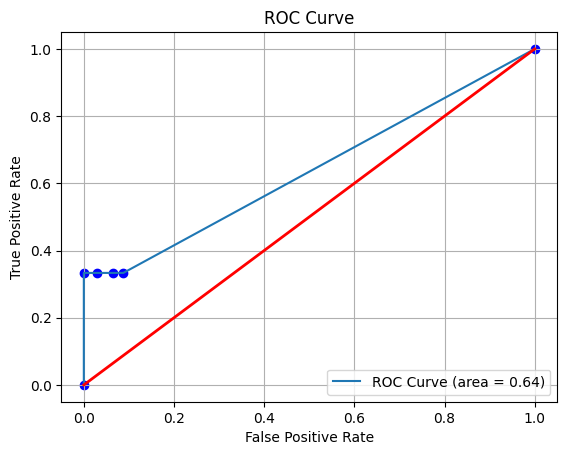

In [ ]:
print("Random Forest: ")
evaluation(rf, x_test, y_test)



XGBoost: 
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9785714285714285
Score: 0.9785714285714285
ROC AUC: 0.8138686131386861
[[137   0]
 [  3   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       0.00      0.00      0.00         3

    accuracy                           0.98       140
   macro avg       0.49      0.50      0.49       140
weighted avg       0.96      0.98      0.97       140



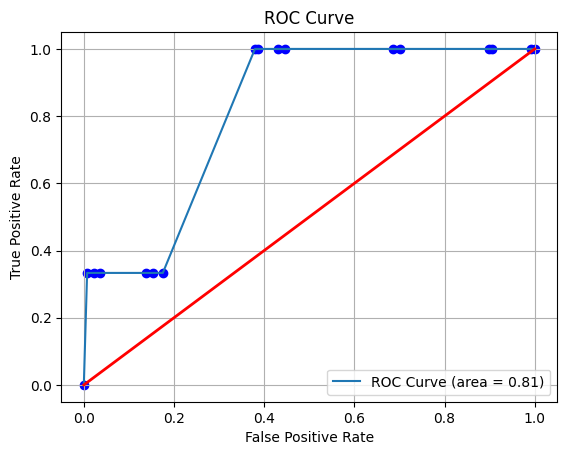

In [ ]:
print("XGBoost: ")
evaluation(xgb, x_test, y_test)

In [ ]:
data['Transaction_Hour'] = data['Transaction_Date'].dt.hour
data['Transaction_Day'] = data['Transaction_Date'].dt.dayofweek
data['Transaction_Month'] = data['Transaction_Date'].dt.month

In [ ]:
data['transaction_count'] = data.groupby('Sender_account')['Transaction_Date'].transform('count')

In [ ]:
data['Suspicion_level'] = data['transaction_count'] * data['Amount']
data['average_transaction_amount'] = data.groupby('Sender_account')['Amount'].transform('mean')


In [ ]:
data['amount_to_avg_ratio'] = data['Amount'] / (data['average_transaction_amount'] + 1)
data = pd.get_dummies(data, columns=['ip_addresses'], drop_first=True)

In [ ]:
data.head()

,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,...,Latitude,Longitude,balance_change,balance_1_ratio,balance_2_ratio,Transaction_Hour,Transaction_Day,Transaction_Month,transaction_count,Suspicion_level
0,1,PAYMENT,9839.64,ACC10204397,170136.0,160296.36,ACC18330495,0.0,0.0,0,...,43.550741,-141.729747,9839.64,0.999994,0.000000,0,3,6,1,9839.64
1,2,PAYMENT,1864.28,ACC36787793,21249.0,19384.72,ACC43829436,0.0,0.0,0,...,78.746308,-2.886483,1864.28,0.999953,0.000000,0,1,7,1,1864.28
2,3,TRANSFER,181.00,ACC69442839,181.0,0.00,ACC19495987,0.0,0.0,1,...,-48.705621,3.433940,181.00,0.994505,0.000000,0,5,2,1,181.00
3,4,CASH_OUT,181.00,ACC13673580,181.0,0.00,ACC94944418,21182.0,0.0,1,...,-54.637488,60.509023,181.00,0.994505,0.999953,0,0,12,1,181.00
4,5,PAYMENT,11668.14,ACC46873273,41554.0,29885.86,ACC17787237,0.0,0.0,0,...,-57.962918,-99.237709,11668.14,0.999976,0.000000,0,2,4,1,11668.14


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sender_account'] = le.fit_transform(data['Sender_account'])

# data['Receiver_account'] = le.fit_transform(data['Receiver_account'])

In [ ]:

if 'Receiver_account' in data.columns:
    data['Receiver_account'] = le.fit_transform(data['Receiver_account'])
else:

    print(f"Available columns: {data.columns}")


Available columns: Index(['Transaction_id', 'Transfer_type', 'Amount', 'Sender_account',
       'Initial_balance_p1', 'new_balance_1', 'Recipient_account',
       'Initial_balance_p2', 'new_balance_2', 'isFraud',
       ...
       'ip_addresses_98.131.248.68', 'ip_addresses_98.145.54.164',
       'ip_addresses_98.183.239.247', 'ip_addresses_98.196.248.83',
       'ip_addresses_98.199.132.55', 'ip_addresses_98.76.69.193',
       'ip_addresses_99.167.174.194', 'ip_addresses_99.21.227.221',
       'ip_addresses_99.229.27.71', 'ip_addresses_99.238.189.2'],
      dtype='object', length=722)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

models = [lor, rf, xgb]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
cvz = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, name in zip(models, model_names):
    scores = cross_val_score(model, x, y, cv=cvz, scoring='accuracy')
    print(f'{name}: Average Accuracy = {scores.mean():.4f} (std = {scores.std():.4f})')


Logistic Regression: Average Accuracy = 0.9971 (std = 0.0057)
Random Forest: Average Accuracy = 0.9928 (std = 0.0045)
XGBoost: Average Accuracy = 0.9929 (std = 0.0045)


In [ ]:
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                        param_distributions=param_dist_xgb,
                                        n_iter=50,
                                        cv=5,
                                        scoring='roc_auc',
                                        verbose=1,
                                        n_jobs=-1,
                                        random_state=42)

In [ ]:
best_xgb_model = random_search_xgb.best_estimator_
xgb_pred = best_xgb_model.predict(x_test)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)
print(f"XGBoost Test ROC AUC: {xgb_roc_auc:.4f}")

In [ ]:
# high-risk transaction hours (range I have given 00:00 - 06:00)
data['high_risk_hour(flag)'] = data['Transaction_Hour'].apply(lambda x: 1 if x < 6 else 0)


In [ ]:
data.head()

,Transaction_id,Transfer_type,Amount,Sender_account,Initial_balance_p1,new_balance_1,Recipient_account,Initial_balance_p2,new_balance_2,isFraud,...,ip_addresses_98.183.239.247,ip_addresses_98.196.248.83,ip_addresses_98.199.132.55,ip_addresses_98.76.69.193,ip_addresses_99.167.174.194,ip_addresses_99.21.227.221,ip_addresses_99.229.27.71,ip_addresses_99.238.189.2,high_risk_hour,high_risk_hour(flag)
0,1,PAYMENT,9839.64,3,170136.0,160296.36,ACC18330495,0.0,0.0,0,...,False,False,False,False,False,False,False,False,1,1
1,2,PAYMENT,1864.28,202,21249.0,19384.72,ACC43829436,0.0,0.0,0,...,False,False,False,False,False,False,False,False,1,1
2,3,TRANSFER,181.00,449,181.0,0.00,ACC19495987,0.0,0.0,1,...,False,False,False,False,False,False,False,False,1,1
3,4,CASH_OUT,181.00,37,181.0,0.00,ACC94944418,21182.0,0.0,1,...,False,False,False,False,False,False,False,False,1,1
4,5,PAYMENT,11668.14,269,41554.0,29885.86,ACC17787237,0.0,0.0,0,...,False,False,False,False,False,False,False,False,1,1


In [ ]:
import joblib
# joblib.dump(lor, 'lor_model.pkl')
# joblib.dump(rf, 'rf_model.pkl')
joblib.dump(xgb, 'xgb_model.pkl')

#sinc emy accuracy score in xgb greater


['xgb_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

model = joblib.load('xgb_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    input_features = pd.DataFrame(data)

    predictions = model.predict(input_features)
    probabilities = model.predict_proba(input_features)[:, 1]

    response = {
        'predictions': predictions.tolist(),
        'probabilities': probabilities.tolist()
    }

    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
